##show rpc dataset seg

In [1]:
import numpy as np
import matplotlib

# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from PIL import Image
import requests
from pycocotools.coco import COCO
import os
import random
from IPython.display import display

In [2]:
coco_annotation_file_path = "/media/ian/WD/datasets/rpc_tmp/synthesize_30000_mix_small_seg.json"
coco_annotation = COCO(annotation_file=coco_annotation_file_path)

loading annotations into memory...
Done (t=5.26s)
creating index...
index created!


In [3]:
# Category IDs.
cat_ids = coco_annotation.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids)  # The IDs are not necessarily consecutive.

Number of Unique Categories: 200
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


In [4]:
# All categories.
cats = coco_annotation.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names)

Categories Names:
['1_puffed_food', '2_puffed_food', '3_puffed_food', '4_puffed_food', '5_puffed_food', '6_puffed_food', '7_puffed_food', '8_puffed_food', '9_puffed_food', '10_puffed_food', '11_puffed_food', '12_puffed_food', '13_dried_fruit', '14_dried_fruit', '15_dried_fruit', '16_dried_fruit', '17_dried_fruit', '18_dried_fruit', '19_dried_fruit', '20_dried_fruit', '21_dried_fruit', '22_dried_food', '23_dried_food', '24_dried_food', '25_dried_food', '26_dried_food', '27_dried_food', '28_dried_food', '29_dried_food', '30_dried_food', '31_instant_drink', '32_instant_drink', '33_instant_drink', '34_instant_drink', '35_instant_drink', '36_instant_drink', '37_instant_drink', '38_instant_drink', '39_instant_drink', '40_instant_drink', '41_instant_drink', '42_instant_noodles', '43_instant_noodles', '44_instant_noodles', '45_instant_noodles', '46_instant_noodles', '47_instant_noodles', '48_instant_noodles', '49_instant_noodles', '50_instant_noodles', '51_instant_noodles', '52_instant_noodles

In [5]:
# Category ID -> Category Name.
query_id = cat_ids[0]
query_annotation = coco_annotation.loadCats([query_id])[0]
query_name = query_annotation["name"]
query_supercategory = query_annotation["supercategory"]
print("Category ID -> Category Name:")
print(
    f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
)

Category ID -> Category Name:
Category ID: 1, Category Name: 1_puffed_food, Supercategory: puffed_food


In [6]:
# Category Name -> Category ID.
query_name = cat_names[2]
query_id = coco_annotation.getCatIds(catNms=[query_name])[0]
print(f"Category Name: -> ID:")
print(f"Category Name: {query_name}, Category ID: {query_id}")

Category Name: -> ID:
Category Name: 3_puffed_food, Category ID: 3


In [7]:
# Get the ID of all the images containing the object of the category.
img_ids = coco_annotation.getImgIds(catIds=[query_id])
print(f"Number of Images Containing {query_name}: {len(img_ids)}")

Number of Images Containing 3_puffed_food: 967


In [17]:
# Pick one image.
# idx = random.choice(range(1, len(img_ids)))
idx = 25000
# img_id = img_ids[idx]
img_id = 25000
img_info = coco_annotation.loadImgs([img_id])[0]
img_file_name = img_info["file_name"]
# img_url = img_info["coco_url"]
img_url = None
print(
    f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
)

Image ID: 25000, File Name: synthesized_image_25000.jpg, Image URL: None


In [18]:
# Get all the annotations for the specified image.
ann_ids = coco_annotation.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = coco_annotation.loadAnns(ann_ids)
print(f"Annotations for Image ID {img_id}:")
print(anns)

Annotations for Image ID 25000:
[{'segmentation': [[392.0, 526.5, 304.5, 490.0, 318.5, 455.0, 333.5, 423.0, 336.5, 413.0, 341.0, 405.5, 356.0, 410.5, 374.0, 419.5, 378.0, 419.5, 388.0, 423.5, 394.0, 427.5, 397.0, 427.5, 424.5, 441.0, 422.5, 454.0, 419.5, 459.0, 419.5, 463.0, 410.5, 488.0, 411.5, 489.0, 408.5, 494.0, 408.5, 498.0, 400.5, 516.0, 392.0, 526.5]], 'iscrowd': 0, 'image_id': 25000, 'category_id': 118, 'id': 3214, 'bbox': [304.5, 405.5, 120.0, 121.0], 'area': 8932.5}, {'segmentation': [[59.0, 650.5, 38.0, 650.5, 25.5, 641.0, 16.5, 623.0, 16.5, 614.0, 18.5, 607.0, 21.5, 603.0, 32.0, 591.5, 118.0, 552.5, 131.0, 551.5, 138.0, 554.5, 146.5, 563.0, 152.5, 575.0, 153.5, 588.0, 149.5, 597.0, 139.0, 605.5, 70.0, 645.5, 59.0, 650.5]], 'iscrowd': 0, 'image_id': 25000, 'category_id': 94, 'id': 3215, 'bbox': [16.5, 551.5, 137.0, 99.0], 'area': 8100.0}, {'segmentation': [[390.0, 352.5, 370.0, 352.5, 367.0, 350.5, 351.0, 346.5, 343.0, 346.5, 328.0, 343.5, 318.0, 338.5, 312.5, 330.0, 311.5, 

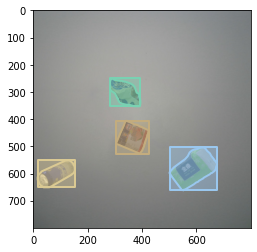

In [19]:
# Use URL to load image.
# im = Image.open(
#     requests.get(os.path.join('/media/ian/WD/datasets/rpc_list/synthesize_1500_best_small', img_file_name),
#                  stream=True).raw)
im = Image.open(os.path.join('/media/ian/WD/datasets/rpc_tmp/synthesize_30000_mix_small', img_file_name))

# Save image and its labeled version.
# plt.axis("off")
plt.imshow(np.asarray(im))
plt.savefig(f"vis_example/{img_id}.jpg", bbox_inches="tight", pad_inches=0)
# Plot segmentation and bounding box.
coco_annotation.showAnns(anns, draw_bbox=True)
plt.savefig(f"vis_example/{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)